# Mini Project 3 - Text Classification

Data used for this project is downloaded from https://www.kaggle.com/datasets/inigolopezrioboo/a-tripadvisor-dataset-for-nlp-tasks, as it is mentioned, original source is: 
 - Botana, Iñigo López-Riobóo, Verónica Bolón-Canedo, Bertha Guijarro-Berdiñas, and Amparo Alonso-Betanzos. "Explain and Conquer: Personalised Text-based Reviews to Achieve Transparency." arXiv preprint arXiv:2205.01759 (2022). (DOI: https://doi.org/10.5281/zenodo.6583422)
 

In social networks, users are linked to a variety of items, defining interactions. In the social platform of TripAdvisor, users are linked to restaurants by means of reviews posted by them. Using the information of these interactions, we can get valuable insights for forecasting, proposing tasks related to recommender systems, sentiment analysis, text-based personalisation or text summarisation, among others. 

This Dataset is part of 6 TripAdvisor datasets from the restaurants of different cities: London, New York, New Delhi, Paris, Barcelona and Madrid.

##### We have decided to work with Barcelona dataset for text classification.  

Reviews collected have been written in English from the restaurants of each city. The tabular data is comprised of a set of six different CSV files, containing numerical, categorical and text features:

 - parse_count: numerical (integer), corresponding number of extracted review by the web scraper (auto-incremental)
 - author_id: categorical (string), univocal, incremental and anonymous identifier of the user (UID_XXXXXXXXXX)
 - restaurant_name: categorical (string), name of the restaurant matching the review
 - rating_review: numerical (integer), review score in the range 1-5
 - sample: categorical (string), indicating “positive” sample for scores 4-5 and “negative” for scores 1-3
 - review_id: categorical (string), univocal and internal identifier of the review (review_XXXXXXXXX)
 - title_review: text, review title
 - review_preview: text, preview of the review, truncated in the website when the text is very long
 - review_full: text, complete review
 - date: timestamp, publication date of the review in the format (day, month, year)
 - city: categorical (string), city of the restaurant which the review was written for
 - url_restaurant: text, restaurant url
 
 
 ##### This project will focus on information we can get from text data that can help predict user satisfication and to build a model which will predict if a review is positive or negative. 

## Loading data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [220]:
data = pd.read_csv("/Users/martahuhoja/Documents/IOD/Mini_project/Barcelona_reviews.csv", low_memory=False)

In [223]:
pd.reset_option('display.max_colwidth')

In [224]:
data.head(5)

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,0,1,Chalito_Rambla,1,Negative,review_774086112,Terrible food Terrible service,"Ok, this place is terrible! Came here bc we’ve...","Ok, this place is terrible! Came here bc we’ve...","October 12, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,1,2,Chalito_Rambla,5,Positive,review_739142140,The best milanesa in central Barcelona,This place was a great surprise. The food is d...,This place was a great surprise. The food is d...,"January 14, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,2,3,Chalito_Rambla,5,Positive,review_749758638,Family bonding,The food is excellent.....the ambiance is very...,The food is excellent.....the ambiance is very...,"March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,3,4,Chalito_Rambla,5,Positive,review_749732001,Best food,"The food is execellent ,affortable price for p...","The food is execellent ,affortable price for p...","March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,4,5,Chalito_Rambla,5,Positive,review_749691057,Amazing Food and Fantastic Service,"Mr Suarez,The food at your restaurant was abso...","Mr Suarez,The food at your restaurant was abso...","March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


In [225]:
data.shape

(416356, 13)

Barcelona dataset has  <b> 416356 </b> rows and <b> 13 </b> columns. To make processing easier, for this project, 10000 samples have been chosen. 

In [226]:
data = data.sample(10000, random_state=13)

In [227]:
data.columns

Index(['Unnamed: 0', 'parse_count', 'restaurant_name', 'rating_review',
       'sample', 'review_id', 'title_review', 'review_preview', 'review_full',
       'date', 'city', 'url_restaurant', 'author_id'],
      dtype='object')

In [228]:
#dropping columns 'Unnamed: 0', 'parse_count' and 'url_restaurant'

data = data.drop(columns = ['Unnamed: 0', 'parse_count', 'url_restaurant'])

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 399811 to 204158
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  10000 non-null  object
 1   rating_review    10000 non-null  object
 2   sample           10000 non-null  object
 3   review_id        10000 non-null  object
 4   title_review     10000 non-null  object
 5   review_preview   10000 non-null  object
 6   review_full      10000 non-null  object
 7   date             10000 non-null  object
 8   city             10000 non-null  object
 9   author_id        10000 non-null  object
dtypes: object(10)
memory usage: 859.4+ KB


In [230]:
# specifying data types

data['restaurant_name'] = data['restaurant_name'].astype('str')
data['rating_review'] = data['rating_review'].astype('int64')
data['sample'] = data['sample'].astype('str')
data['review_id'] = data['review_id'].astype('str')bb
data['date'] = data['date'].astype('datetime64[ns]')
data['city'] = data['city'].astype('str')
data['author_id'] = data['author_id'].astype('str')

In [231]:
data.shape

(10000, 10)

In [232]:
data.head(5)

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,author_id
399811,Ciudad_Condal,5,Positive,review_303189870,best tapas in town,always a must for an early afternoon lunch.ver...,always a must for an early afternoon lunch. ve...,2015-08-25,Barcelona_Catalonia,UID_115016
2496,Rao,5,Positive,review_637072072,Excellent dîner experience !,"Nice decoration, nice service, great Tapas and...","Nice decoration, nice service, great Tapas and...",2018-12-02,Barcelona_Catalonia,UID_2413
7863,Bodega_Biarritz_1881,5,Positive,review_356159441,Thank you Trip Advisor :-),Had a few bad and overpriced meals while in Ba...,Had a few bad and overpriced meals while in Ba...,2016-03-16,Barcelona_Catalonia,UID_7457
358169,7_Portes,5,Positive,review_442056530,Fantastic paella,Nice old restaurant in barceloneta! We had a p...,Nice old restaurant in barceloneta! We had a p...,2016-12-04,Barcelona_Catalonia,UID_161839
76037,Bar_Canete,5,Positive,review_575830444,"Very good tapas, easy going but attentive service","Don't let the name deceive you, this is more o...","Don't let the name deceive you, this is more o...",2018-04-26,Barcelona_Catalonia,UID_62612


Final data has 10 000 rows and 10 columns.

##### Checking for null and NA values - there are none:

In [233]:
data.isna().sum()

restaurant_name    0
rating_review      0
sample             0
review_id          0
title_review       0
review_preview     0
review_full        0
date               0
city               0
author_id          0
dtype: int64

In [234]:
data.isnull().sum()

restaurant_name    0
rating_review      0
sample             0
review_id          0
title_review       0
review_preview     0
review_full        0
date               0
city               0
author_id          0
dtype: int64

##### Checking unique values in specific columns

In [235]:
data['restaurant_name'].nunique()

2352

In [240]:
data['restaurant_name'].value_counts()

Cerveceria_Catalana         126
Ciudad_Condal               122
Colom                        71
Tapas_24                     67
7_Portes                     62
                           ... 
La_Fluta                      1
Creperie_Bretonne_Anaick      1
Saioa                         1
Doble_Zeroo                   1
Gran_Torino_Garage_Bar        1
Name: restaurant_name, Length: 2352, dtype: int64

- Out of 10000 samples, there are 2352 different restaurants; 2 of them - Cerveceria Catalana and Ciudad Condal appear in reviews more than 100 times. 

In [241]:
data['review_id'].nunique()

10000

- Each review is unique.

In [242]:
data['author_id'].nunique()

9599

In [243]:
data['author_id'].value_counts()

UID_7046      11
UID_10153      8
UID_1073       5
UID_19707      4
UID_28970      4
              ..
UID_186000     1
UID_123180     1
UID_60911      1
UID_184546     1
UID_139849     1
Name: author_id, Length: 9599, dtype: int64

- There are 9599 different author id's which means that some people have submitted multiple reviews - used UID_7046 has 11 reviews. 

In [244]:
data['city'].value_counts()

Barcelona_Catalonia    10000
Name: city, dtype: int64

- Name of city is specified the same in all samples. 

In [267]:
data['date'].max()

Timestamp('2020-10-24 00:00:00')

In [268]:
data['date'].min()

Timestamp('2007-12-13 00:00:00')

#### Investigating review values:

- in this dataset, reviews have already been categorised as Positive (if review is above 3) and Negative (if review is 3 and under). 

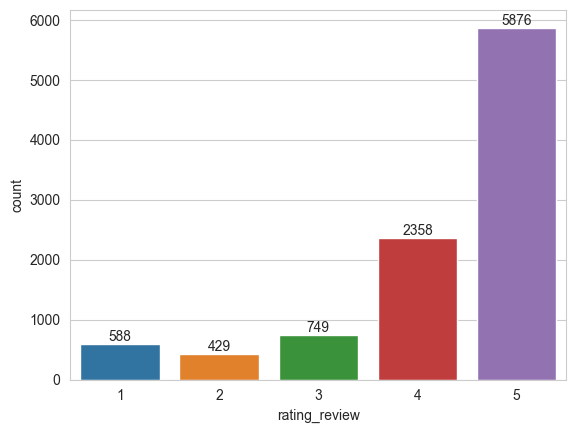

In [245]:
ax = sns.countplot(data=data, x="rating_review")
ax.bar_label(ax.containers[0])
plt.show()

In [246]:
data['sample'].value_counts()

Positive    8234
Negative    1766
Name: sample, dtype: int64

In [247]:
data['sample'] = data['sample'].replace(['Negative', 'Positive'], [0,1])

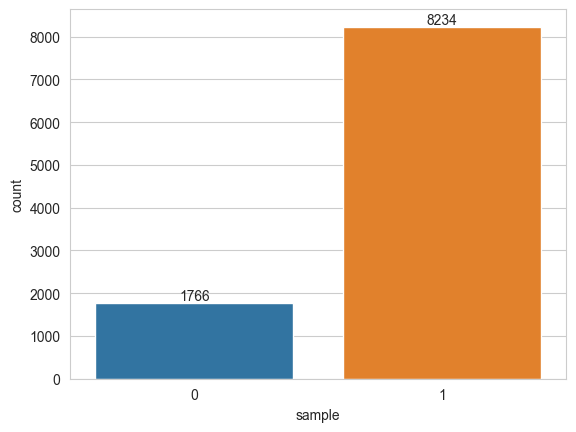

In [248]:
ax = sns.countplot(data=data, x="sample")
ax.bar_label(ax.containers[0])
plt.show()

### Working with text data

In [63]:
import regex as re
import spacy
import nltk
from nltk.tokenize import sent_tokenize

In [64]:
nlp = spacy.load('en_core_web_md')
from spacy.lang.en.stop_words import STOP_WORDS

Creating new column <i> <b> review_short </i> </b> after applying lambda function that tokenizes reviews; filters out words that are not stop words/punctuation and lemmatizes words to base form. 

In [249]:
%%time
data['review_short'] = data['review_full'].apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if (not token.is_stop and not token.is_punct)))

CPU times: user 2min 14s, sys: 4.11 s, total: 2min 18s
Wall time: 2min 23s


In [250]:
data['review_short'] =  [token.lower() for token in data['review_short']]

- Additionally turning all text into lowercase 

#### Creating text based features: 
   - char_count - number of charcters in a review
   - sent_count - number of sentences in a review
   - word_count - number of words in a review 

In [251]:
data["char_count"] = data['review_full'].map(lambda x: len(x))
data["sent_count"] = data['review_full'].map(lambda x: len(sent_tokenize(x)))
data["word_count"] = data['review_full'].map(lambda x: len(x.split()))

<b> Summary statistic for new features: </b>

In [252]:
data[['char_count','sent_count','word_count']].describe()

,char_count,sent_count,word_count
count,10000.000000,10000.00000,10000.00000
mean,380.708200,5.14130,69.06880
std,311.170824,3.48562,57.55425
min,13.000000,1.00000,2.00000
25%,177.000000,3.00000,31.00000
50%,288.000000,4.00000,52.00000
75%,478.000000,6.00000,87.00000
max,6180.000000,61.00000,1109.00000


 - Maximum number of characters in a review is 6180 and minimum 13 with majority being around 380 characters.
 - Longest review has 61 sentence, shortest just 1 and mean is around 5 sentences per review. 
 - Most reviews have around 69 words; minimum number of words in a review is 2 and maximum 1109. 

In [257]:
pd.set_option('display.max_colwidth', None)  

In [196]:
data[data['char_count' ]== 6180]

restaurant_name rating_review  sample         review_id  \
69713  Restaurante_Lasarte             5       1  review_192474856   

                                             title_review  \
69713  Artful decadence in every aspect of the experience   

                                                                                                                                                                                                                                        review_preview  \
69713  The meal began when three waiters placed in front of us on large golden plates four single fork sized pieces of food arranged in an eating order so as to maximize the play of flavors on our tongue. The first portion was a truffle, which...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

- Comment with most caracthers has most words as well, however, that is not the comment with most sentences. 

In [197]:
data[data['sent_count' ]== 61]

restaurant_name rating_review  sample         review_id  \
152892            ABaC             4       1  review_708175475   

                      title_review  \
152892  Great 3* with a few issues   

                                                                                                                                                                                                                                                              review_preview  \
152892  Four of us (British) planned a week’s gastronomic visit to Barcelona. We have all eaten in Michelin-star restaurants before.  For this trip we chose 1* Angle,  2* Disfrutar and 3* ABaC in that order over one week. We booked four months in advance on-line. I...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [198]:
data[data['char_count' ]== 13]

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,author_id,char_count,sent_count,word_count,review_short,polarity,pos_tags
287451,Los_Caracoles,3,0,review_25871265,Great paella!,Great paella!,Great paella!,"March 8, 2009",Barcelona_Catalonia,UID_178604,13,1,2,great paella,1.0,"[(Great, NNP), (paella, NN), (!, .)]"


- Comment with lowest number of characters also has lowest number of words and sentences. 

In [199]:
positive = data.loc[data['sample']==1]

In [200]:
positive[['char_count','sent_count','word_count']].describe()

,char_count,sent_count,word_count
count,8234.000000,8234.000000,8234.000000
mean,358.290138,4.950328,64.639058
std,288.257976,3.302636,53.002193
min,40.000000,1.000000,7.000000
25%,170.000000,3.000000,30.000000
50%,272.000000,4.000000,49.000000
75%,451.000000,6.000000,81.000000
max,6180.000000,61.000000,1109.000000


In [201]:
positive[positive['char_count' ]== 40]

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,author_id,char_count,sent_count,word_count,review_short,polarity,pos_tags
275230,Bestial,4,1,review_15457359,"Nice food, beautiful terrace, but a bore","Nice food, beautiful terrace, but a bore","Nice food, beautiful terrace, but a bore","December 13, 2007",Barcelona_Catalonia,UID_80935,40,1,7,nice food beautiful terrace bore,0.725,"[(Nice, NNP), (food, NN), (,, ,), (beautiful, JJ), (terrace, NN), (,, ,), (but, CC), (a, DT), (bore, NN)]"


- Shortest review that is marked as positive

In [202]:
negative = data.loc[data['sample']==0]

In [203]:
negative[['char_count','sent_count','word_count']].describe()

,char_count,sent_count,word_count
count,1766.000000,1766.00000,1766.000000
mean,485.232729,6.03171,89.722537
std,384.281632,4.12154,71.718232
min,13.000000,1.00000,2.000000
25%,225.000000,3.00000,42.000000
50%,376.500000,5.00000,69.000000
75%,621.750000,8.00000,114.000000
max,3702.000000,35.00000,689.000000


In [204]:
negative[negative['char_count' ]== 3702]

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,author_id,char_count,sent_count,word_count,review_short,polarity,pos_tags
323860,La_Tagliatella_Barceloneta_Barcelona,1,0,review_352475627,Terrible from start to abrupt finish,My husband and I came here as it was across the road from our hotel (h10 port vell). It was his 30th birthday and as the restaurant we had originally planned to visit was closed we decided to try some good old fashioned Italian food....,"My husband and I came here as it was across the road from our hotel (h10 port vell). It was his 30th birthday and as the restaurant we had originally planned to visit was closed we decided to try some good old fashioned Italian food. On entry to the almost empty restaurant, we were pointed to a table by a young waiter who then took our drinks order and ignored our request to see an English version of the menu. We could already sense from the complete lack of atmosphere that we may be in for disappointment. When we managed to catch the attention of another waiter we asked again for an English menu and were presented with one. My husband decided on steak and I chose a taglierine with garlic, chilli and prawns. First off, I asked if I could have a side order of salad and was told no, fair enough, this wasn't on the menu but in this day and age you would think they could manage it. The waiter then walked away without asking how my husband would like his steak cooked. We called him back and tried to ask if it was perhaps cooked a certain way in explanation to why he hadn't asked and were fobbed off with the old 'I don't understand, let me get someone else'. After a few minutes we were approached by another waiter and asked the question to which he said 'well how do you want it done?' So my husband asked for medium rare. 15 minutes or so later our food arrived where things went from bad to worse. My husbands food was cold and the steak was cooked well done. My 'taglierine' - which I will admit I had never heard of nor eaten before - was almost exactly like super noodles (most English should understand) with shrimp - not prawns. It was completely tasteless, stodgy and not very warm either. After one unsatisfactory bite we called the waiter back over and said 'I'm sorry but the food is really bad' to which was met with an absolutely disgusted face and 'what is wrong with it?'. We explained that it was neither warm nor appetising and after being bombarded with pure rudeness I was forced to say that it was not satisfactory and that we would not be eating or paying for it but that he could bring the bill for our drinks. He said he would have to consult his manager and left our table with the food in front of us to do so. When he returned he wanted further explanation as to why we were unhappy with the meals. We explained again - the menu said prawns 'yes, shrimp, prawns'...those are two very different things! Cold temperature/ poor taste etc and after many screwed up facial expressions he picked up my husbands food and said 'this I can understand but yours - that's just how it comes, there is nothing wrong with it, that's just pasta'. Obviously at this point I was quite frustrated/ insulted and explained that I had eaten pasta once or twice before in my life and had never experienced this lack of standard. Again, he screwed up his face and told me how wrong I was whilst clearing the table and muttering under his breath. My husband, who's birthday was looking thoroughly bleak at this point, was so stressed out by the situation that I had to send him outside whilst I waited to pay for the drinks. I am absolutely outraged by the horrendous service. If the food was the same but the complaint had been better received I may not have been compelled to leave such a scathing review but unfortunately, this is now my only outlet for expressing my disappointment with such a terrible experience. If I could think of one positive point I would be mor

- longest negative comment (per characters and words)

In [205]:
negative[negative['sent_count' ]== 35]

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,author_id,char_count,sent_count,word_count,review_short,polarity,pos_tags
164581,Pla_Restaurant,3,0,review_138851103,"Fabulous atmosphere, food was hit and miss","I wanted to love this place. The atmosphere was excellent and the menu looked fun and interesting, with things like ""Thai"" rape (monkfish) with curry. I'm a spice girl, so I like when other chefs play with spices - and heat - in interesting ways....","I wanted to love this place. The atmosphere was excellent and the menu looked fun and interesting, with things like ""Thai"" rape (monkfish) with curry. I'm a spice girl, so I like when other chefs play with spices - and heat - in interesting ways. The staff were a little slow in waiting on us. The first person to seat us asked if we wanted water and we said yes. She came back 10 minutes later and asked if we wanted water again. Why, yes, that would be great. Our first choice of wine they did not have, so she recommended a few others and we settled on one that turned out to be a nice, light tempranillo that worked well with our fish, pork, and lamb dishes. Our starters: calabin carpaccio with sundried tomatoes and parmesan. This was nice. It wasn't extraordinary, but the ingredients were top shelf and so it was a great salad. We also had the carpaccio of pork with a fresh, mushroom ragout of sorts on top. This was a disappointment. The pork did not have much flavor and the whole dish was underseasoned. With a little more salt, this could have been a really good dish. My friend, also a cook, agreed. Our mains: Thai monkfish with a curry and lemongrass sauce, and a lamb with mashed potatoes and manchego cheese. The lamb was excellent and expertly cooked. The monkfish was also expertly cooked but had absolutely zero flavor. No salt, no curry, not even a taste of fish. Just bland. The shrimp on the side did have flavor, so I wished there was more than one. Our desserts: Mojito foam and a flourless chocolate tort with a wasabi filling and wasabi cream on top. The mojito foam was a perfect palette cleanser and the chocolate tort was excellent. There was just the right amount of wasabi in each of the cream and filling. This was the star of dinner. The excellent: The atmosphere. The place is hip and charming at the same time. It's down a very small side street that can be confusing to find, but once there, the decor, the architecture and the lighting is fabulous. Definitely sit upstairs, as you have a bird's eye view of everything going on downstairs, as well. At the end of the night, we did tell our waiter our thoughts and the chef came out to talk with us as well. Both were genuinely interested to know what we liked and disliked and why. To me, that's a sign of a great restaurant. But, for the price, the food should have been spectacular, as this is really why one goes to a restaurant. I would give it 3.5 stars out of 5, or overall 6.5 out of 10.","August 30, 2012",Barcelona_Catalonia,UID_111440,2487,35,463,want love place atmosphere excellent menu look fun interesting thing like thai rape monkfish curry spice girl like chef play spice heat interesting way staff little slow wait person seat ask want water say yes come 10 minute later ask want water yes great choice wine recommend settle turn nice light tempranillo work fish pork lamb dish starter calabin carpaccio sundrie tomato parmesan nice extraordinary ingredient shelf great salad carpaccio pork fresh mushroom ragout sort disappointment pork flavor dish underseasoned little salt good dish friend cook agree main thai monkfish curry lemongrass sauce lamb mashed potato manchego cheese lamb excellent expertly cook monkfish expertly cook absolutely zero flavor salt curry taste fish bland shrimp flavor wish dessert mojito foam flourless chocolate tort wasabi filling wasabi cream mojito foam perfect palette cleanser chocolate tort excellent right wasabi cream filling star dinner e

### Creating most frequent bigrams (combination of two words) with CountVectorizer

In [262]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['review_short'])

In [263]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ['frequency', 'bigram']

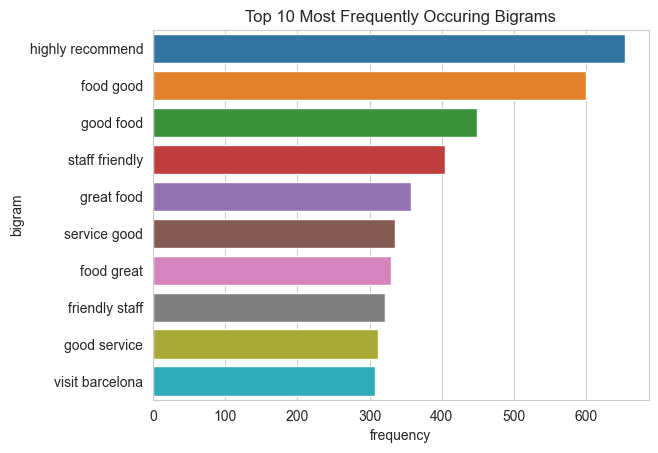

In [264]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['bigram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

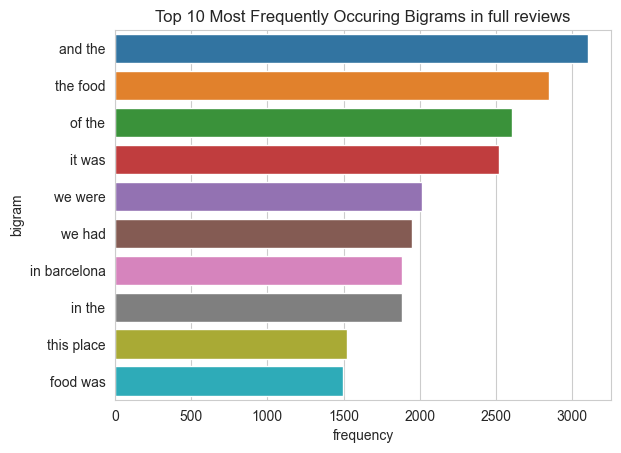

In [144]:
bigrams = cv.fit_transform(data['review_full'])
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ['frequency', 'bigram']
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['bigram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams in full reviews')
plt.show()

Most frequent words in full review text include stop words and it is not relevant. 

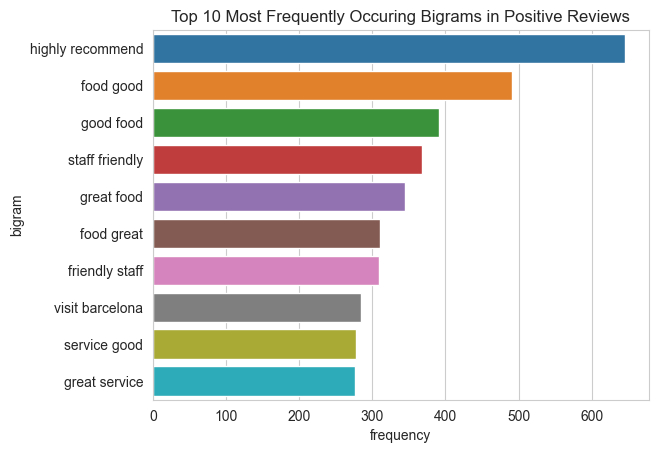

In [265]:
bigrams = cv.fit_transform(positive['review_short'])
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ['frequency', 'bigram']
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['bigram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams in Positive Reviews')
plt.show()

Most frequent words in positive reviews (rated 4 or 5) are almost the same as most frequent overall - which is not surprising as positive samples make over 80% percent of data. 

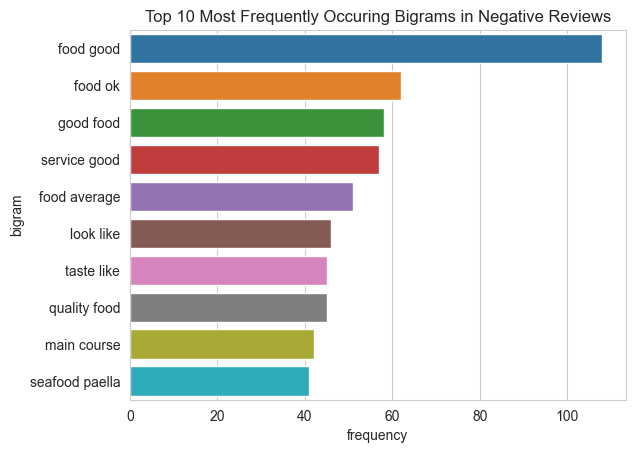

In [266]:
bigrams = cv.fit_transform(negative['review_short'])
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ['frequency', 'bigram']
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['bigram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams in Negative Reviews')
plt.show()

Stop word 'not' has been removed which has impacted bigrams in ngeative comments - there are no extremely negative words.

### Calculating most frequent occuring words

In [146]:
from collections import Counter

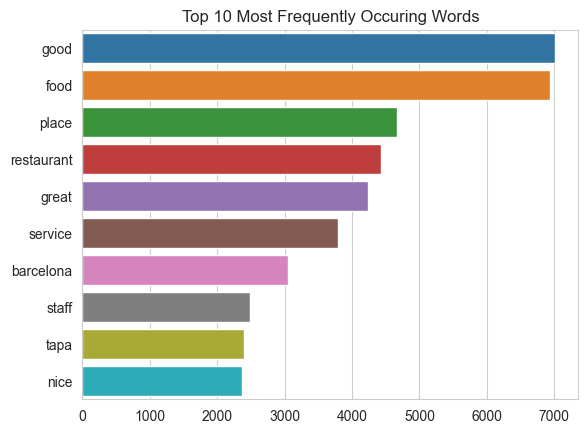

In [151]:
tokens = [nltk.word_tokenize(text) for text in data['review_short']]
tokens = [token for sublist in tokens for token in sublist]

counter = Counter(tokens)
mostCommon = counter.most_common(10)
mostCommon

words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
    
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

### Wordcloud

In [260]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

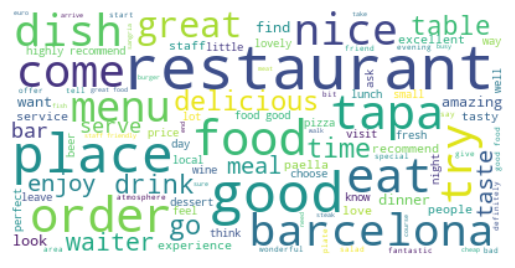

In [261]:
text = " ".join(review for review in data['review_short'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Calculating polarity of data with textblob

In [166]:
from textblob import TextBlob


In [254]:
%%time
data['polarity'] = data['review_full'].apply(lambda text: TextBlob(text).sentiment.polarity)

CPU times: user 1.93 s, sys: 15.8 ms, total: 1.94 s
Wall time: 1.94 s


In [255]:
data[['polarity']].describe()

,polarity
count,10000.000000
mean,0.336166
std,0.226338
min,-1.000000
25%,0.213185
50%,0.341667
75%,0.475000
max,1.000000


In [258]:
data[data['polarity']==1]

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,author_id,review_short,char_count,sent_count,word_count,polarity
207781,GAMBITO_BCN,5,1,review_261641602,Excellent Place in Bcn,"I was here for Holliday one week in barcelona and you must try the steak , it's so tasty and delicious.","I was here for Holliday one week in barcelona and you must try the steak , it's so tasty and delicious.",2015-03-25,Barcelona_Catalonia,UID_141653,holliday week barcelona try steak tasty delicious,103,1,21,1.0
40730,Colom,5,1,review_704326417,The best paella in town,"Wonderful vegetable paella, exquisite service and great atmosphere! 100% would recommend! You cant miss it!","Wonderful vegetable paella, exquisite service and great atmosphere! 100% would recommend! You cant miss it!",2019-08-29,Barcelona_Catalonia,UID_35764,wonderful vegetable paella exquisite service great atmosphere 100 recommend not miss,107,3,15,1.0
335526,4_Gats,1,0,review_273378949,Drinks,"I, my wife and student grandaughter visited this place on Tuesday 19th. May and requested 3 gin and tonics.When it eventually came, we enjoyed them then asked for the bill.€49.50 !!!!!!!!I have been ripped off before but never with the style of...","I, my wife and student grandaughter visited this place on Tuesday 19th. May and requested 3 gin and tonics. When it eventually came, we enjoyed them then asked for the bill. €49.50 !!!!!!!! I have been ripped off before but never with the style of 4 Gats",2015-05-20,Barcelona_Catalonia,UID_188680,wife student grandaughter visit place tuesday 19th request 3 gin tonic eventually come enjoy ask bill € 49.50 rip style 4 gat,254,6,47,1.0
49589,Dona_Rosa,5,1,review_689321028,hopa!!,good vibe !! they diserve 10 stars it was the beest dinner that we had in barcelona..try the fush shawarma.,good vibe !! they diserve 10 stars it was the beest dinner that we had in barcelona..try the fush shawarma.,2019-07-13,Barcelona_Catalonia,UID_42753,good vibe diserve 10 star be dinner barcelona try fush shawarma,107,3,20,1.0
17778,Sasha_Bar_1968,5,1,review_420462660,"...last dinner in BCN with friends,.,..",Sasha bar is a must see place in BCN! the cocktails the food and the kinds personnel is really worth a visit! We were there twice in a week and our amusement and satisfaction was ever increasing!!! ciao Luna!!!,Sasha bar is a must see place in BCN! the cocktails the food and the kinds personnel is really worth a visit! We were there twice in a week and our amusement and satisfaction was ever increasing!!! ciao Luna!!!,2016-09-20,Barcelona_Catalonia,UID_16467,sasha bar place bcn cocktail food kind personnel worth visit twice week amusement satisfaction increase ciao luna,210,5,39,1.0
353182,Cuberlina,5,1,review_767121180,Muy bien!,We visited here yesterday. We also returned to dine here again today as the food is delicious and excellent value.Highly recommended.,We visited here yesterday. We also returned to dine here again today as the food is delicious and excellent value.Highly recommended.,2020-08-26,Barcelona_Catalonia,UID_205535,visit yesterday return dine today food delicious excellent value highly recommend,133,2,21,1.0
79430,La_Antigua_Cabana,5,1,review_714265951,Great service,Juan-Carlos the best waiter ever!!! He made mw and my friend feel taken care of from the moment we looked at the place!,Juan-Carlos the best waiter ever!!! He made mw and my friend feel taken care of from the moment we looked at the place!,2019-09-30,Barcelona_Catalonia,UID_65066,juan carlos good waiter mw friend feel take care moment look place,119,2,23,1.0
217701,Ajoblanco_Tapas_Restaurante_Cocktail_Bar,5,1,review_350947177,Raul is the best,The best drinks of barcelona. Raul rules. Bes treatment in barcelona. The rest of catalan people don't understand the turist we like the way they are.,The best drinks of barcelona. Raul rules. Bes treatment in barcelona. The rest of catalan people don't understand the turist we like the way they are

In [174]:
data[data['polarity']== -1]

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,author_id,char_count,sent_count,word_count,review_short,polarity
299399,El_Guindilla,1,0,review_230144758,Do not go here,"Terrible service, terrible food, dishes are charged twice as 'they come as 2 servings per plate'. AVOID!!","Terrible service, terrible food, dishes are charged twice as 'they come as 2 servings per plate'. AVOID!!","September 21, 2014",Barcelona_Catalonia,UID_183677,105,3,17,terrible service terrible food dish charge twice come 2 serving plate avoid,-1.0
345148,Asador_De_Galicia_3,2,0,review_394365572,Caffè pessimo,"Il caffè era imbevibile anche con tanto zucchero!I just tried this coffee, but I didn't drink it because the taste was very bad!","Il caffè era imbevibile anche con tanto zucchero!I just tried this coffee, but I didn't drink it because the taste was very bad!","July 19, 2016",Barcelona_Catalonia,UID_202501,128,1,23,il caffè era imbevibile anche con tanto zucchero!i try coffee drink taste bad,-1.0


In [259]:
data[data['polarity']==0]

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,author_id,review_short,char_count,sent_count,word_count,polarity
336248,La_Gavina,1,0,review_652694809,give it a miss,This restaurant looks good from the outside and is in a lovely location. However that is where the good bit ends. We were shown to our table and then didn't get seen again for another 20 minutes and they didn't even have the excuse that...,"This restaurant looks good from the outside and is in a lovely location. However that is where the good bit ends. We were shown to our table and then didn't get seen again for another 20 minutes and they didn't even have the excuse that it was overly busy. We ordered drinks that took another 10 minutes to arrive. Food we ordered was mediocre, in fact the calamari we sent back because it was not good and very soggy. The only thing this restaurant has going for it is the location. Unfortunately they have a prime position so will get customer despite poor service and poor food.",2019-02-15,Barcelona_Catalonia,UID_199088,restaurant look good outside lovely location good bit end show table see 20 minute excuse overly busy order drink take 10 minute arrive food order mediocre fact calamari send good soggy thing restaurant go location unfortunately prime position customer despite poor service poor food,581,7,107,0.0
73434,La_Nueva_Marquesa,1,0,review_334593202,Showed up and not seated,Showed up after our tour and had reservations and told booked. We waited and then after some time told to leave and blamed others because he can't find reservation No English No records Not friendlyAvoid,Showed up after our tour and had reservations and told booked. We waited and then after some time told to leave and blamed others because he can't find reservation No English No records Not friendlyAvoid,2015-12-23,Barcelona_Catalonia,UID_36982,show tour reservation tell book wait time tell leave blame find reservation english record friendlyavoid,203,2,35,0.0
90052,Ristorante_Margherita,5,1,review_736868834,5 stars,5 stars for restaurant and our waiter Jordi. Interior 5Dish 5 ( we ate Pizza & Pasta )Waiter 5We'll be back again.Gracias ❤,5 stars for restaurant and our waiter Jordi. Interior 5Dish 5 ( we ate Pizza & Pasta )Waiter 5We'll be back again.Gracias ❤,2020-01-04,Barcelona_Catalonia,UID_72582,5 star restaurant waiter jordi interior 5dish 5 eat pizza pasta waiter 5we'll gracia ❤,123,2,23,0.0
181448,Pura_Brasa_Arenas,5,1,review_700441145,Vacation,It was the beast restaurant in the townThe personal was verty goodThe portion was big and delicios,It was the beast restaurant in the townThe personal was verty goodThe portion was big and delicios,2019-08-18,Barcelona_Catalonia,UID_128010,beast restaurant townthe personal verty goodthe portion big delicio,98,1,17,0.0
348333,Ocana,3,0,review_584479990,Quality of food,"Burger should be a beefburger, but smelled like porc. Traders wanted us to sell drugs or children's toys","Burger should be a beefburger, but smelled like porc. Traders wanted us to sell drugs or children's toys",2018-06-01,Barcelona_Catalonia,UID_203777,burger beefburger smell like porc trader want sell drug child toy,104,2,18,0.0
354922,Starbucks,3,0,review_605585370,Quick visit,"Nothing chances at Starbucks, where-ever in the world you are.Slightly overpriced products, but you know this before you order.Even though, the shakes and specialty drinks are scrumptious.","Nothing chances at Starbucks, where-ever in the world you are.Slightly overpriced products, but you know this before you order.Even though, the shakes and specialty drinks are scrumptious.",2018-08-12,Barcelona_Catalonia,UID_131016,chance starbucks world slightly overpriced product know order shake specialty drink scrumptious,188,1,27,0.0
376690,Cerveseria_Pepe_2,4,1,review_415808852,Great for toasties!,Another place close to our hotel and well placed to rest up with a coffee and toastie in the shade from 30+ degree heat.,Another

### Specifying words by part of speech

In [175]:
data['pos_tags'] = data['review_full'].apply(lambda text: nltk.pos_tag(nltk.word_tokenize(text)))

In [239]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

In [183]:
data.head(5)

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,author_id,char_count,sent_count,word_count,review_short,polarity,pos_tags
399811,Ciudad_Condal,5,1,review_303189870,best tapas in town,always a must for an early afternoon lunch.ver...,always a must for an early afternoon lunch. ve...,"August 25, 2015",Barcelona_Catalonia,UID_115016,580,9,114,early afternoon lunch lively outside seating a...,0.238948,"[(always, RB), (a, DT), (must, MD), (for, IN),..."
2496,Rao,5,1,review_637072072,Excellent dîner experience !,"Nice decoration, nice service, great Tapas and...","Nice decoration, nice service, great Tapas and...","December 2, 2018",Barcelona_Catalonia,UID_2413,171,3,29,nice decoration nice service great tapas great...,0.666667,"[(Nice, NNP), (decoration, NN), (,, ,), (nice,..."
7863,Bodega_Biarritz_1881,5,1,review_356159441,Thank you Trip Advisor :-),Had a few bad and overpriced meals while in Ba...,Had a few bad and overpriced meals while in Ba...,"March 16, 2016",Barcelona_Catalonia,UID_7457,642,10,122,bad overpriced meal barcelona turn trip adviso...,0.304053,"[(Had, VBD), (a, DT), (few, JJ), (bad, JJ), (a..."
358169,7_Portes,5,1,review_442056530,Fantastic paella,Nice old restaurant in barceloneta! We had a p...,Nice old restaurant in barceloneta! We had a p...,"December 4, 2016",Barcelona_Catalonia,UID_161839,140,4,28,nice old restaurant barceloneta paella enjoy l...,0.320833,"[(Nice, NNP), (old, JJ), (restaurant, NN), (in..."
76037,Bar_Canete,5,1,review_575830444,"Very good tapas, easy going but attentive service","Don't let the name deceive you, this is more o...","Don't let the name deceive you, this is more o...","April 26, 2018",Barcelona_Catalonia,UID_62612,313,4,57,let deceive restaurant bar booking favour queu...,0.310612,"[(Do, VBP), (n't, RB), (let, VB), (the, DT), (..."


## Machine Learning Models

In [210]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [211]:
X = data['review_short']
y = data['sample']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

### Modelling will be done with SVC and Logistic Regression and using both Countvectorizor and TF-IDF Vectorizor

In [209]:
classifier = SVC(kernel='linear', probability=True)
classifier1 = LogisticRegression(max_iter=10000)

counts = CountVectorizer()
tfidf = TfidfVectorizer()

#### - CountVectorizor SVC

In [215]:
%%time

A = counts.fit_transform(X_train)
classifier.fit(A.toarray(), y_train)
B = counts.transform(X_test)
predictions = classifier.predict(B.toarray())
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.8990
CPU times: user 10min 42s, sys: 10.2 s, total: 10min 52s
Wall time: 10min 55s


In [217]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       391
           1       0.93      0.95      0.94      1609

    accuracy                           0.90      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.90      0.90      0.90      2000



#### - CountVectorizor LR

In [214]:
%%time

A = counts.fit_transform(X_train)
classifier1.fit(A.toarray(), y_train)
B = counts.transform(X_test)
predictions = classifier1.predict(B.toarray())
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.9110
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       391
           1       0.93      0.97      0.95      1609

    accuracy                           0.91      2000
   macro avg       0.88      0.82      0.85      2000
weighted avg       0.91      0.91      0.91      2000

CPU times: user 33.3 s, sys: 1.42 s, total: 34.7 s
Wall time: 5.21 s


#### - TfidfVectorizor SVC

In [218]:
%%time


A = tfidf.fit_transform(X_train)
classifier.fit(A.toarray(), y_train)
B = tfidf.transform(X_test)
predictions = classifier.predict(B.toarray())

print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.9125
CPU times: user 13min 10s, sys: 10.8 s, total: 13min 21s
Wall time: 13min 24s


In [219]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.65      0.75       391
           1       0.92      0.98      0.95      1609

    accuracy                           0.91      2000
   macro avg       0.89      0.81      0.85      2000
weighted avg       0.91      0.91      0.91      2000



#### - TfidfVectorizor LR

In [213]:

%%time

tfidf = TfidfVectorizer()
A = tfidf.fit_transform(X_train)
classifier1.fit(A.toarray(), y_train)
B = tfidf.transform(X_test)
predictions = classifier1.predict(B.toarray())
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8965
              precision    recall  f1-score   support

           0       0.91      0.52      0.66       391
           1       0.89      0.99      0.94      1609

    accuracy                           0.90      2000
   macro avg       0.90      0.75      0.80      2000
weighted avg       0.90      0.90      0.89      2000

CPU times: user 14.9 s, sys: 777 ms, total: 15.6 s
Wall time: 2.48 s


## Conclusion

- Logistic Regression method where CountVectorizer has been applied and SVC where TF-IDF Vectorizer has been applied both has scored accuracy 91%  on test data
- we can use this model to detect (negative) reviews business want to respond to 
- if trained on data for specific restaurant, it can be used to detect areas that have to be improved
- further actions could include analysing comments of specific users to see if they are more prone to leave positive/negative comments (polarity) or to detect if they always write very long/short reviews
- more sophisticated model could be build to use reviews for recommendations to specific users
